In [1]:
import os
import re
import sys
from pathlib import Path

import h5py
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import skimage
from skimage import io
from sklearn import preprocessing
from tqdm.notebook import tqdm, trange
import anndata as ad
import cv2
import pickle
from sklearn.preprocessing import StandardScaler

In [2]:
d_dir = (Path().cwd().parents[0].parents[0]).absolute()
data_dir = d_dir / "09_datasets"

p_dir = (Path().cwd().parents[0]).absolute()

In [3]:
dataset_1 = data_dir / '01_codex_data'
dataset_2 = data_dir / '02_tissue_architecture'
dataset_3 = data_dir / '03_Sci_Data_Cycif' 
dataset_5 = data_dir / '05_MCMICRO' / 'TNP_pilot_cycif' 

mask_folder = data_dir / 'exported' / 'foll_masks'

In [4]:
%load_ext autoreload
%autoreload 2

module_path = str(p_dir / "src")

if module_path not in sys.path:
    sys.path.append(module_path)


In [6]:
import morph

In [7]:
def plot(data, ax, N=100, concat=False,**kwargs):
    if concat:
        x = np.concatenate([data[:N], [data[0]]])
        y = np.concatenate([data[N:], [data[N]]])
    else:
        x = data[1]
        y = data[0]
        x = np.append(x, x[0])
        y = np.append(y, y[0])
    ax.plot(x, y, linewidth=2, **kwargs)
    ax.set_aspect('equal')
    ax.axis('off')

In [8]:
import math

def plot_point(point, angle, length, ax):
    '''
    point - Tuple (x, y)
    angle - Angle you want your end point at in degrees.
    length - Length of the line you want to plot.

    Will plot the line on a 10 x 10 plot.
    '''

    # unpack the first point
    x, y = point

    # find the end point
    endy = y + length * math.sin(angle)
    endx = x + length * math.cos(angle)

    # plot the points
    ax.plot([x, endx], [y, endy])

# Read data

In [9]:
# Load extracted foll and gc contours 
foll_data_path = mask_folder / 'foll.npz'
gc_data_path = mask_folder / 'gc.npz'

data_path = p_dir / 'data' / 'morph' / 'morph_data.pkl'

if data_path.exists():
    print('Loaded existing file.')
    morph_data = morph.MORPH.load(data_path)
else:
    # Create MORPH data object
    morph_data = morph.MORPH(mask_folder, foll_data_path, gc_data_path)

    # Extract boundaries
    morph_data.load_boundaries()

    morph_data.resample_boundaries()
    morph_data.save_pickle(data_path)

Loaded existing file.


In [10]:
N = morph_data.num_points

outlinePCA = morph.OutlinePCA(morph_data)

Fitting Follicle and GC boundaries PCA
Constructing latent space variation


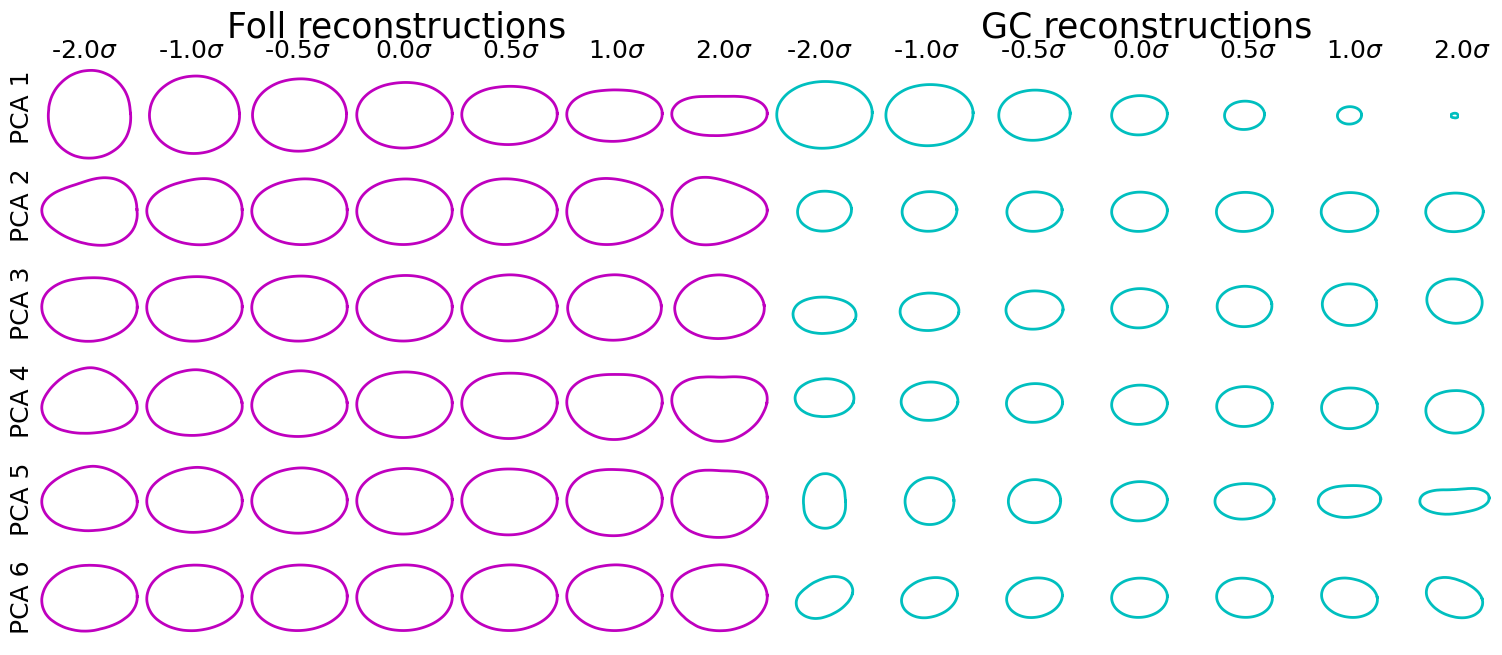

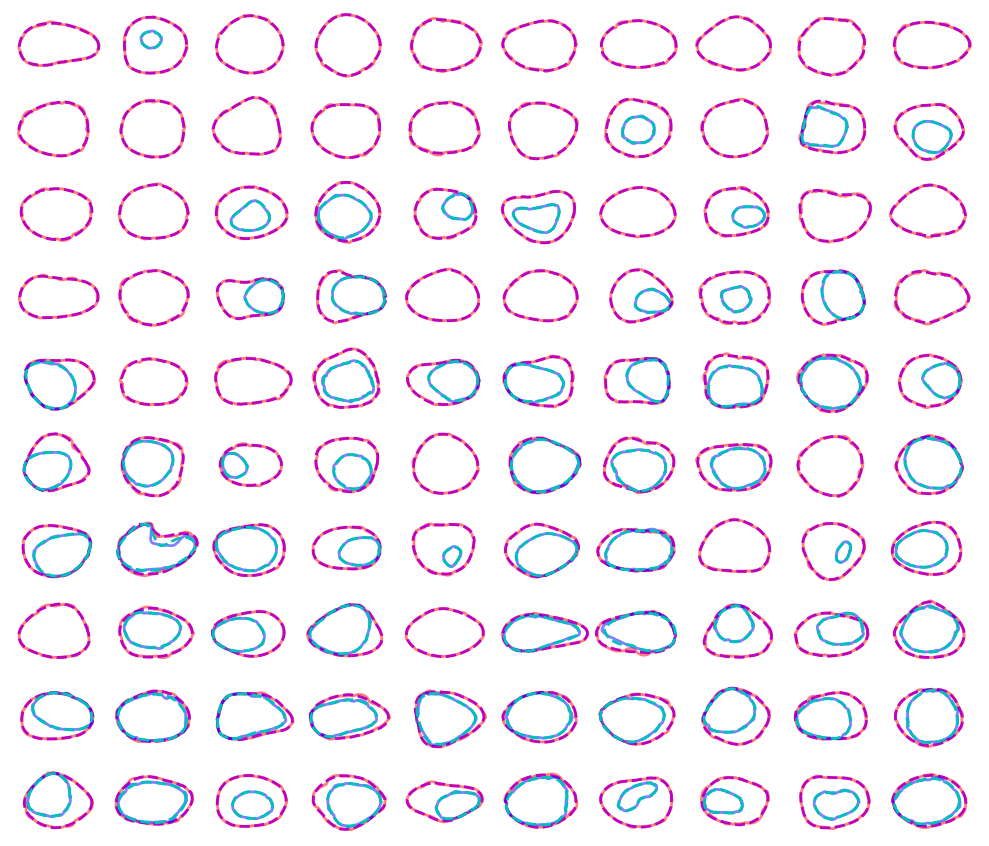

In [11]:
outlinePCA.plot_latent_rep(N)
outlinePCA.plot_latent_reconstruction(N)

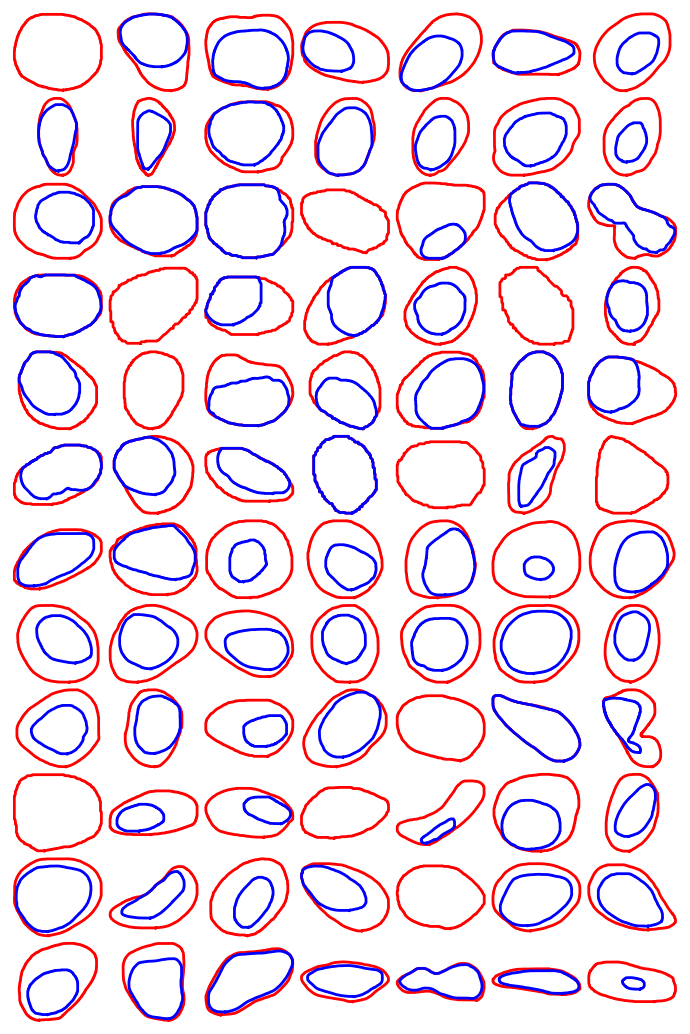

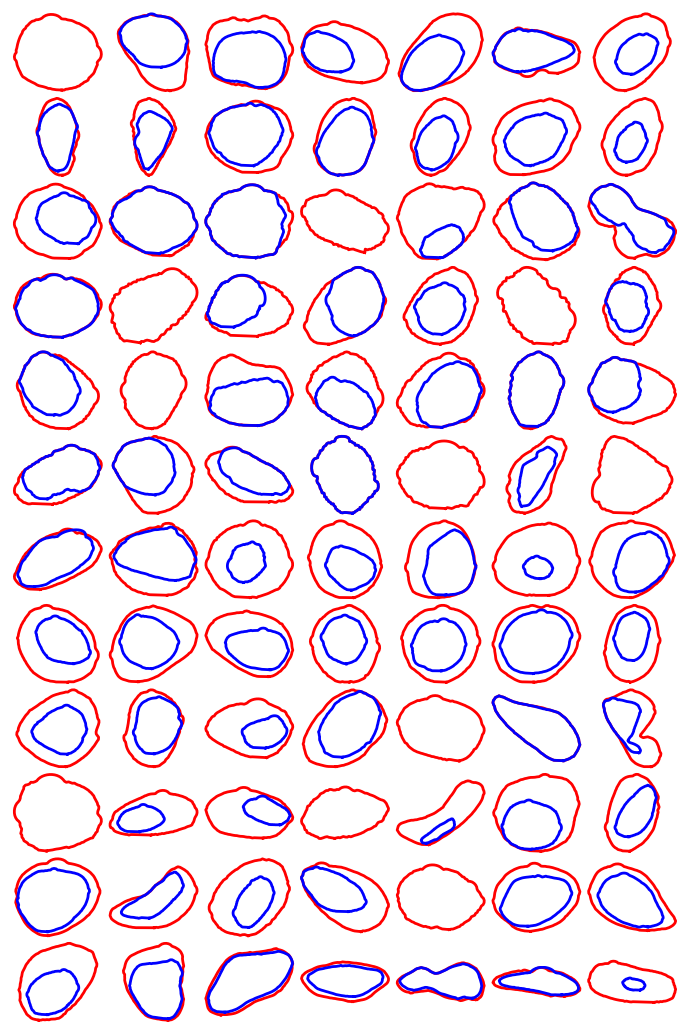

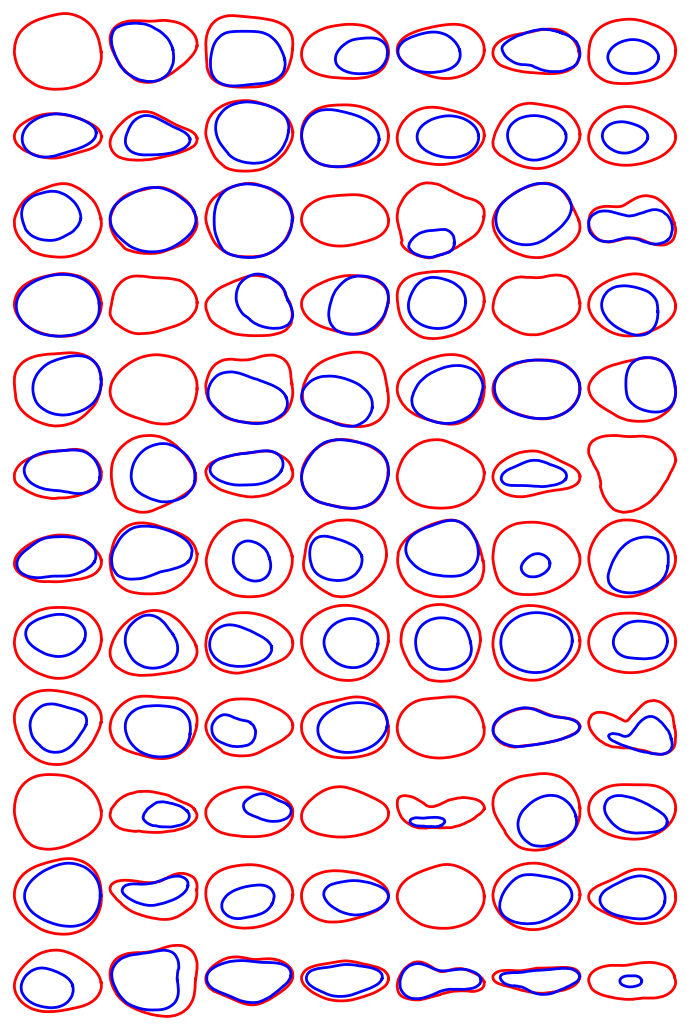

In [30]:
outlinePCA.plot_random_data(N)

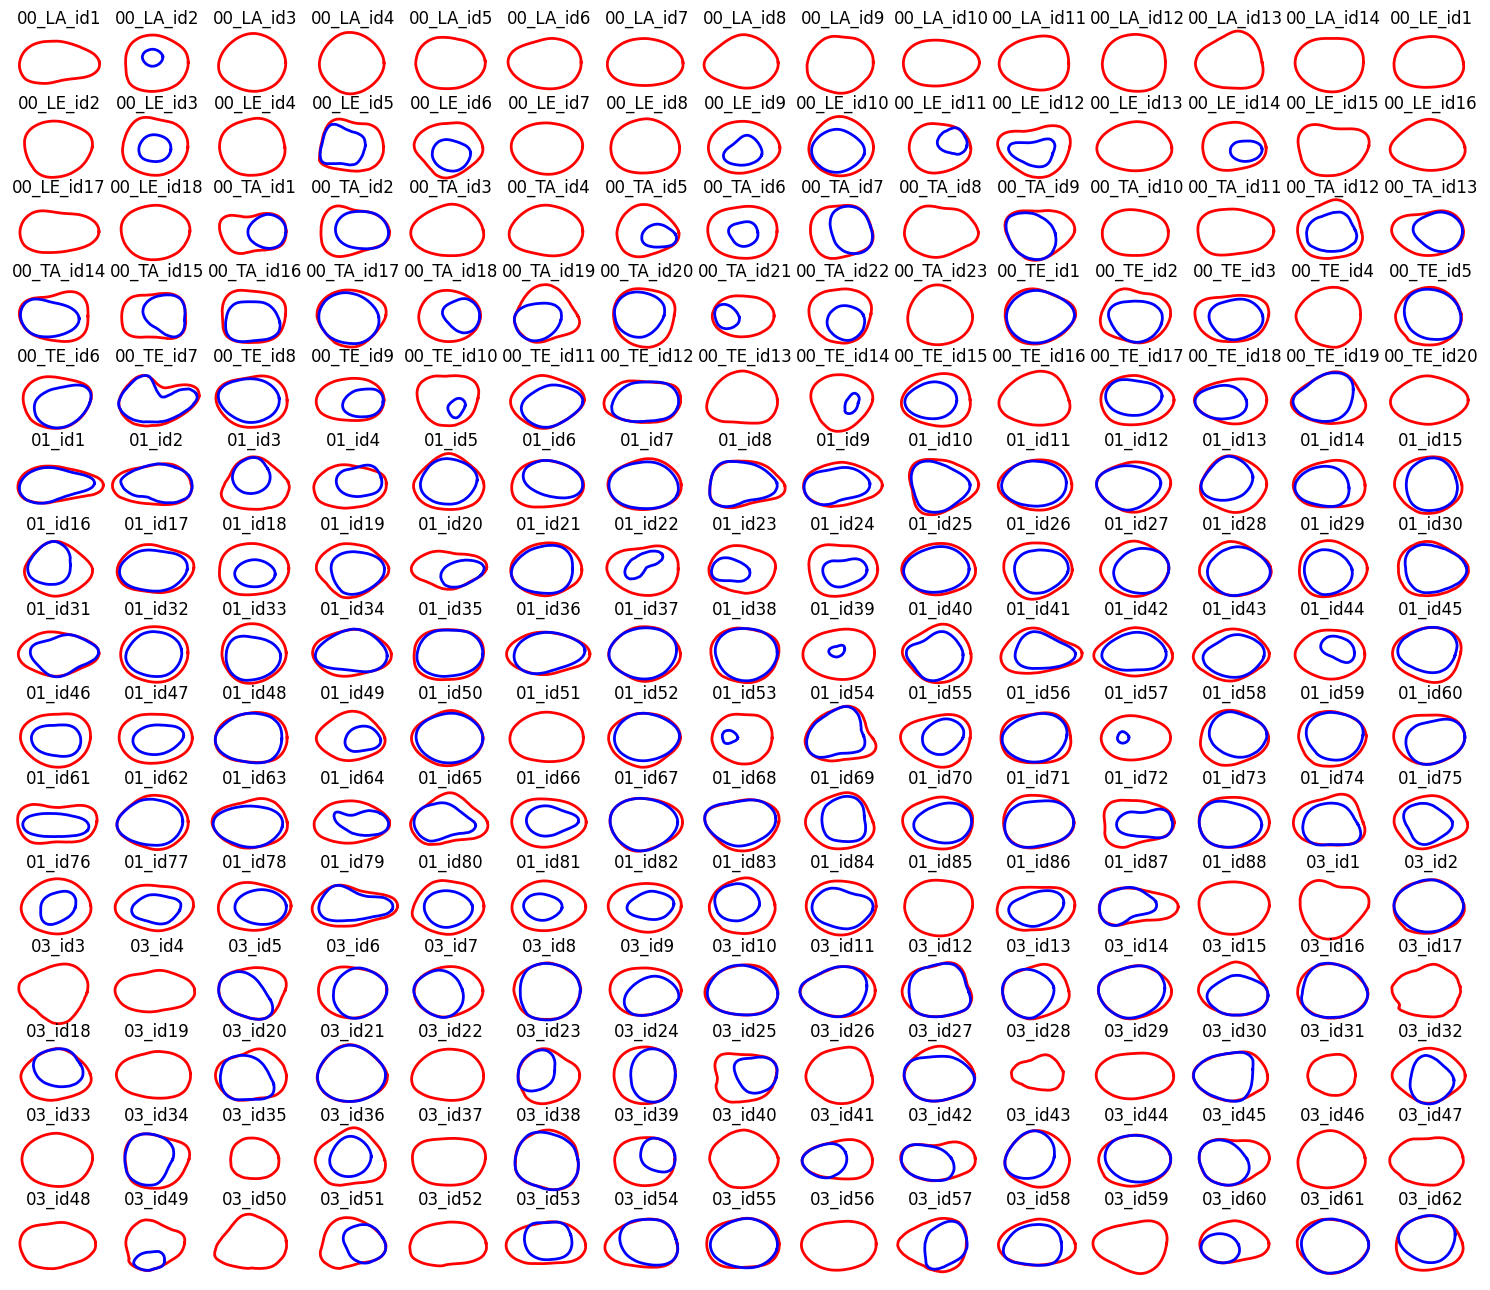

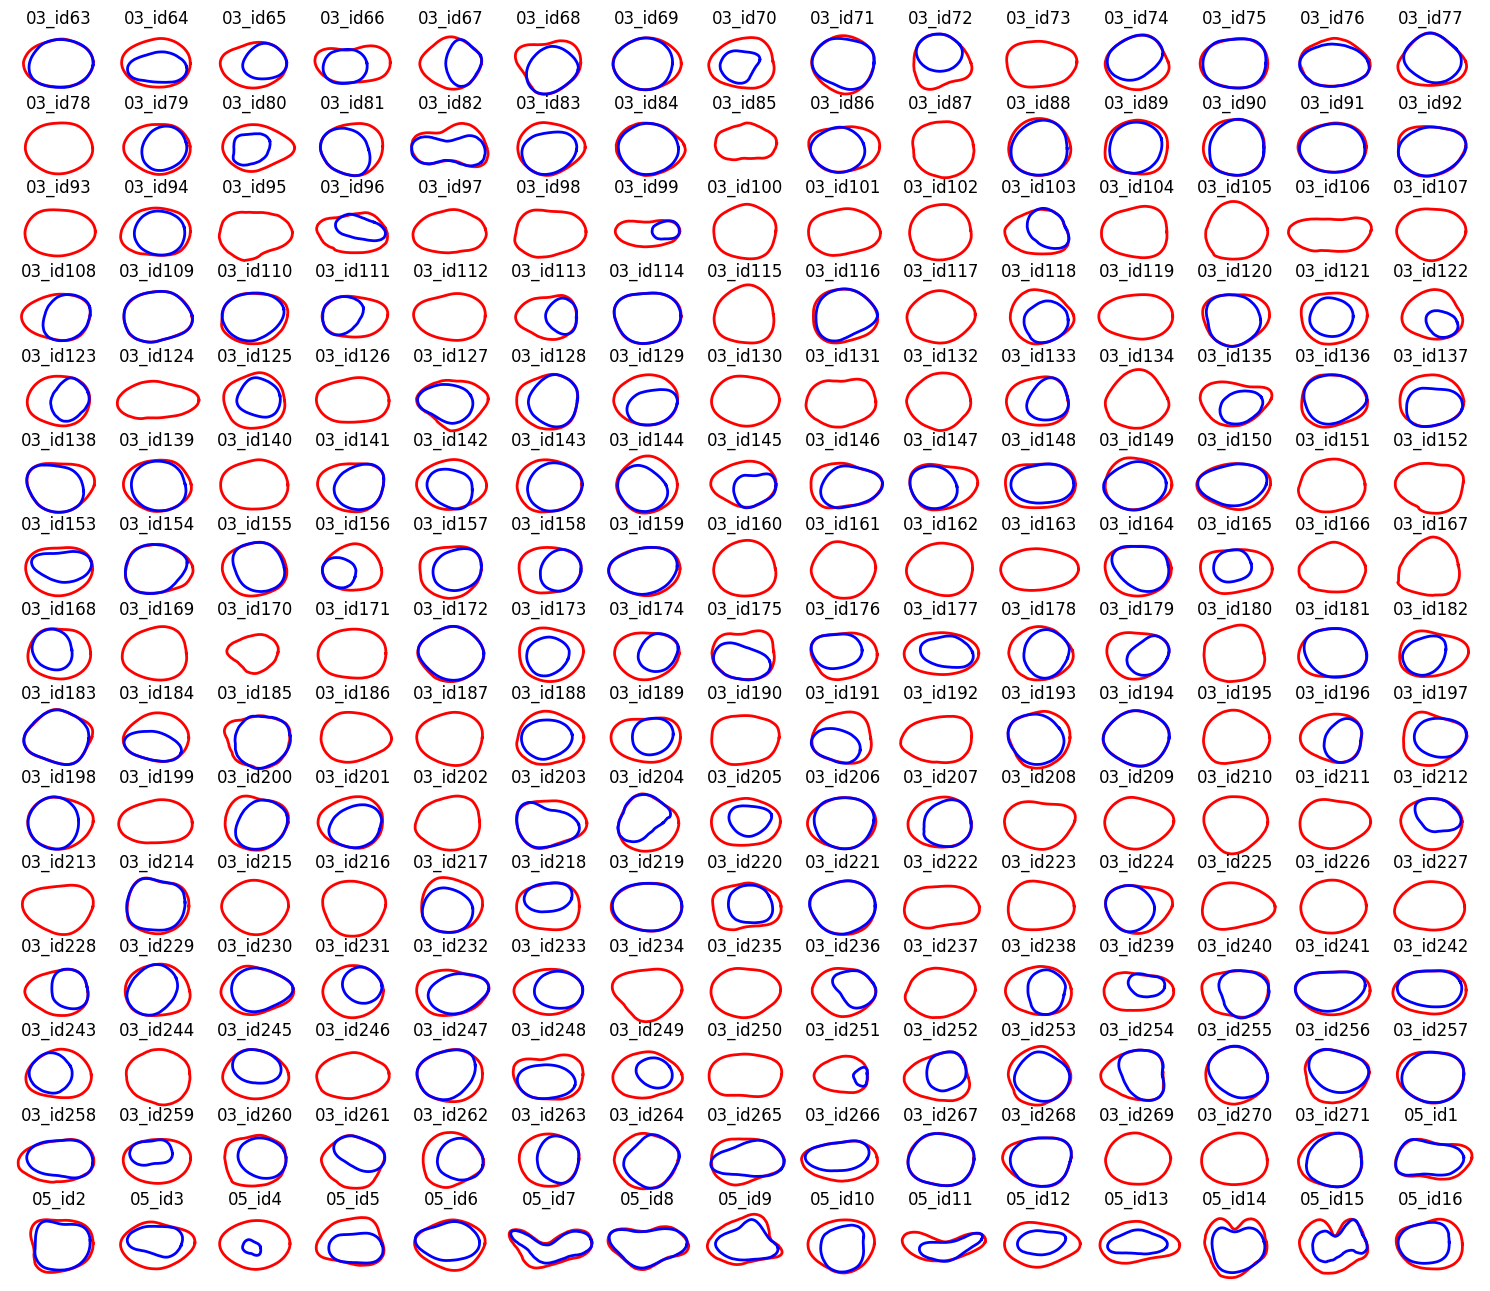

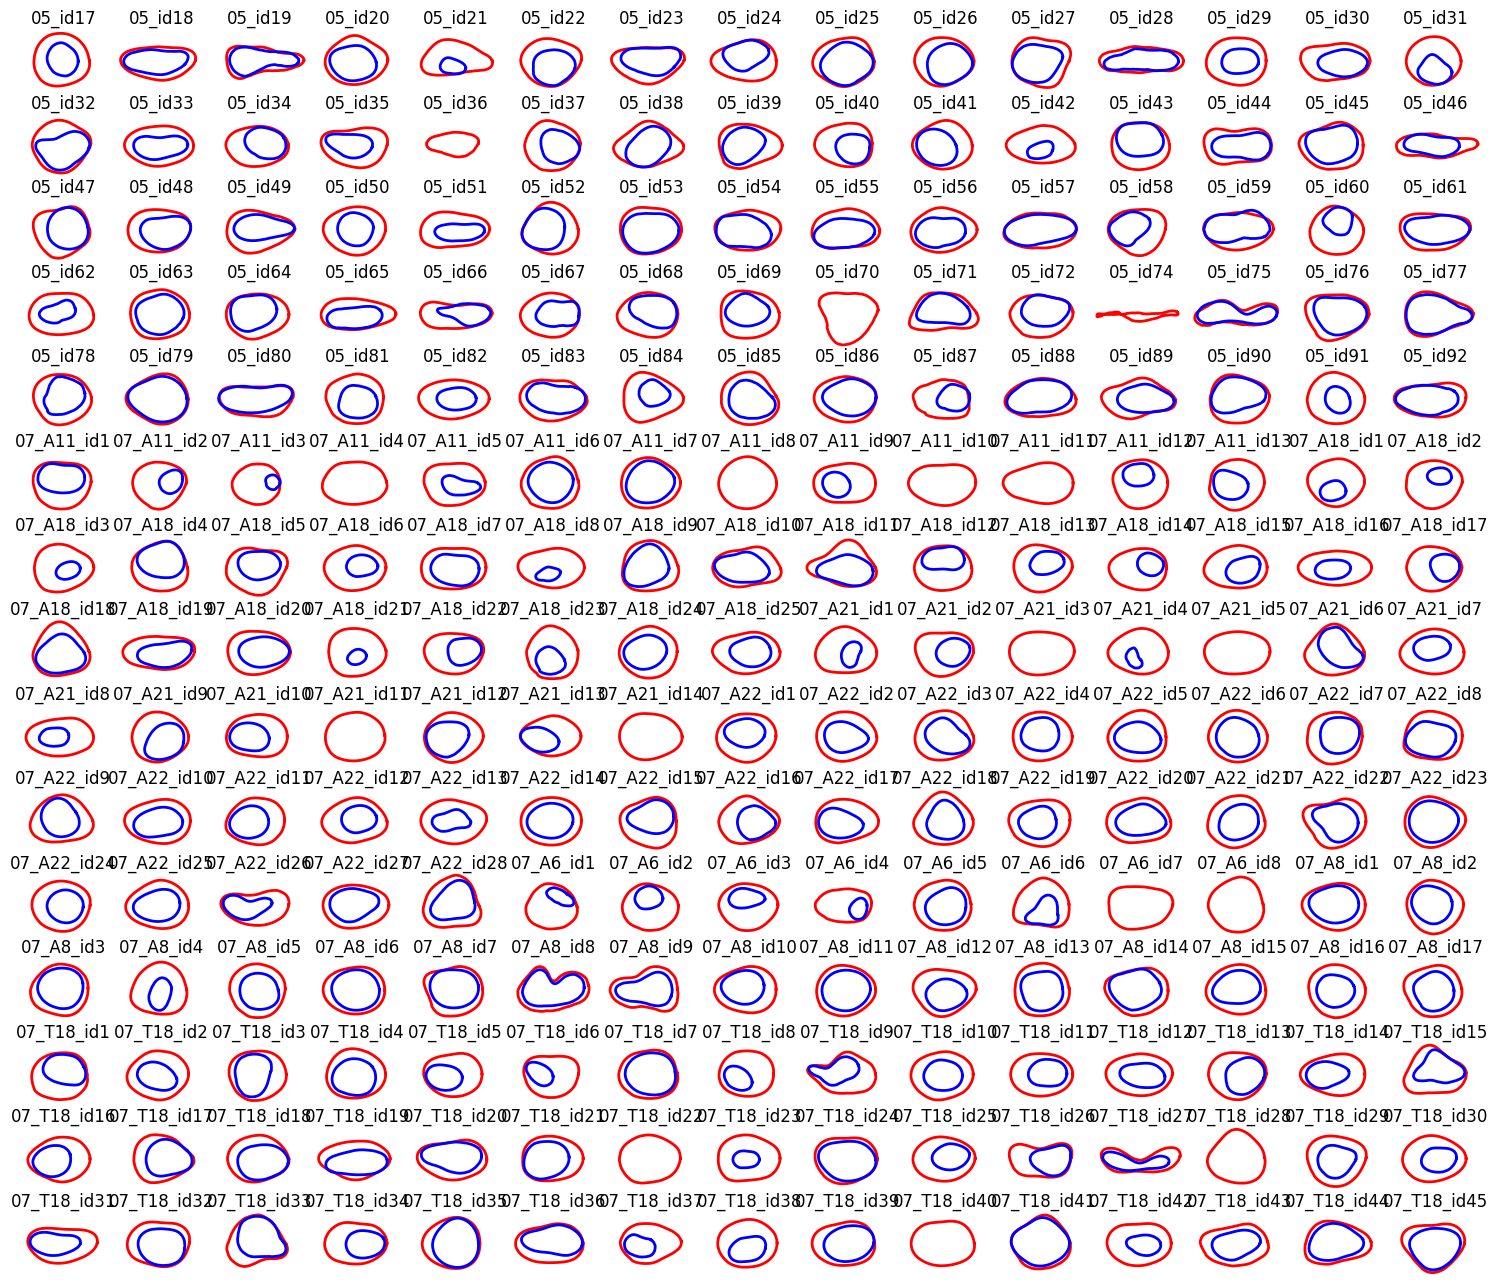

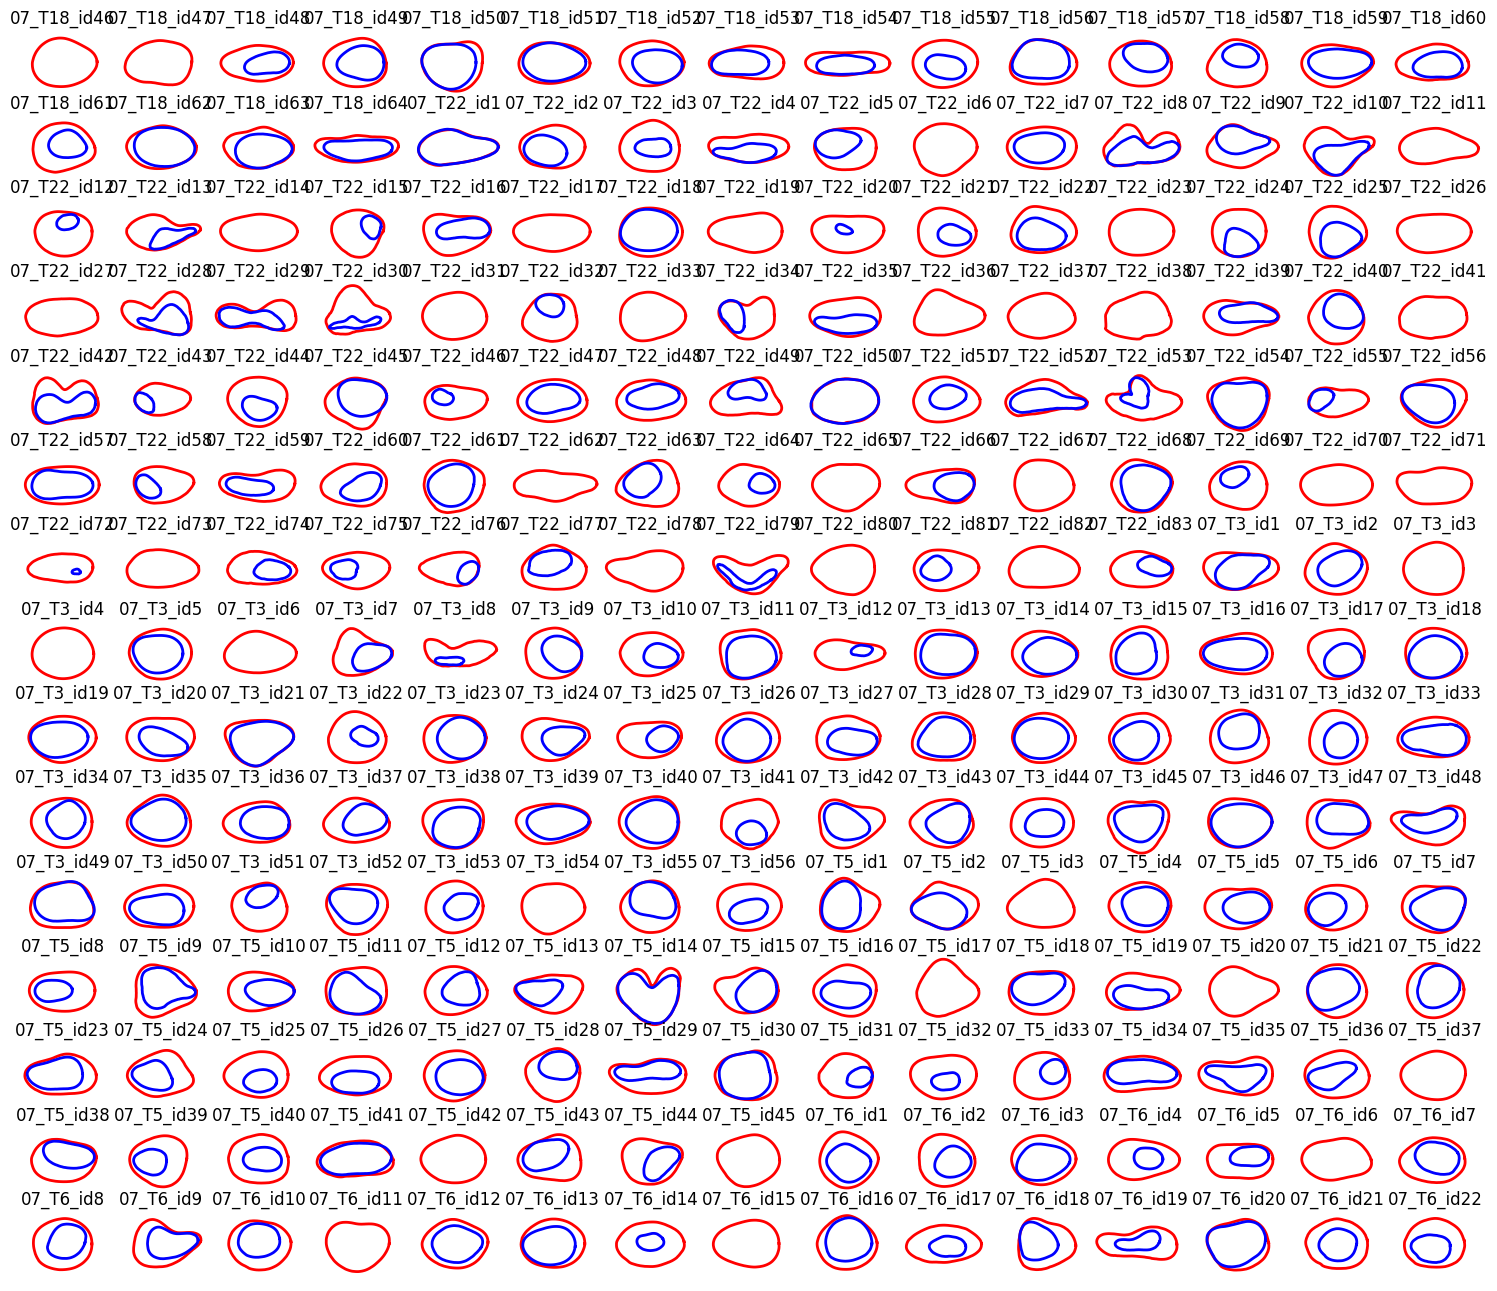

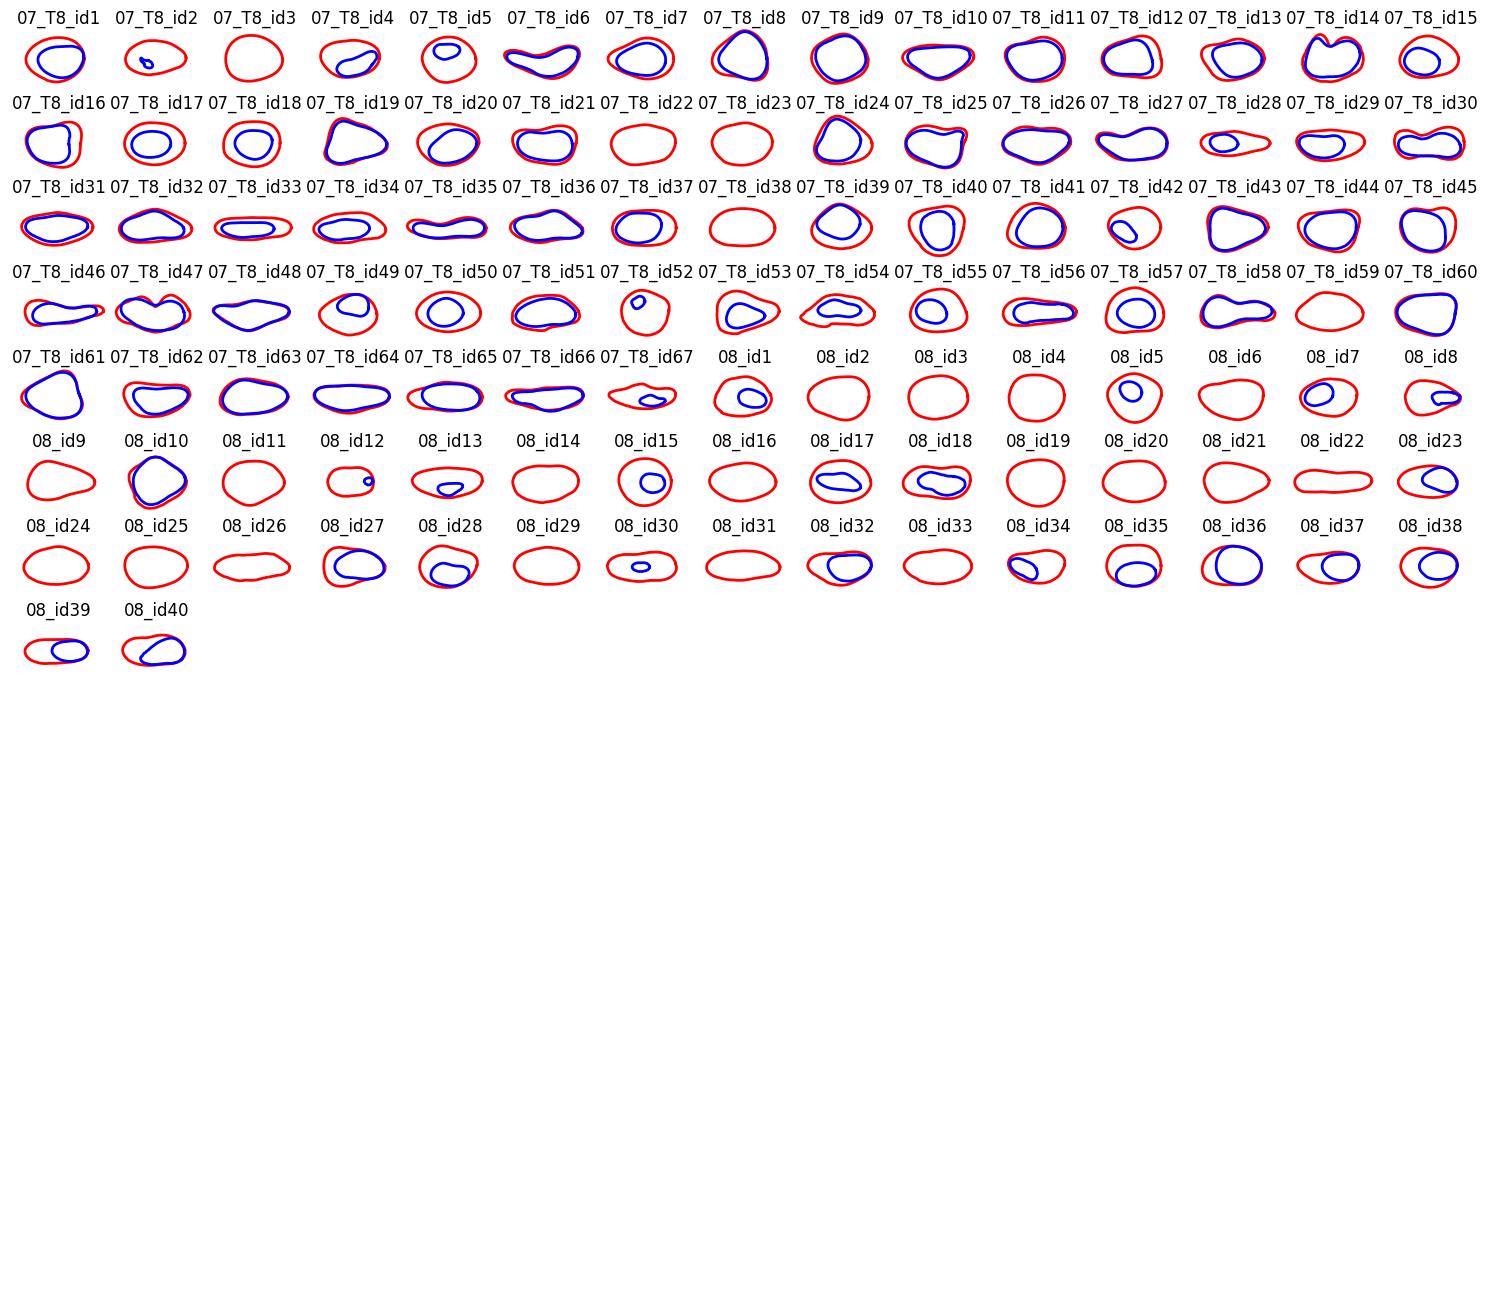

In [31]:
outlinePCA.plot_all_data(N)

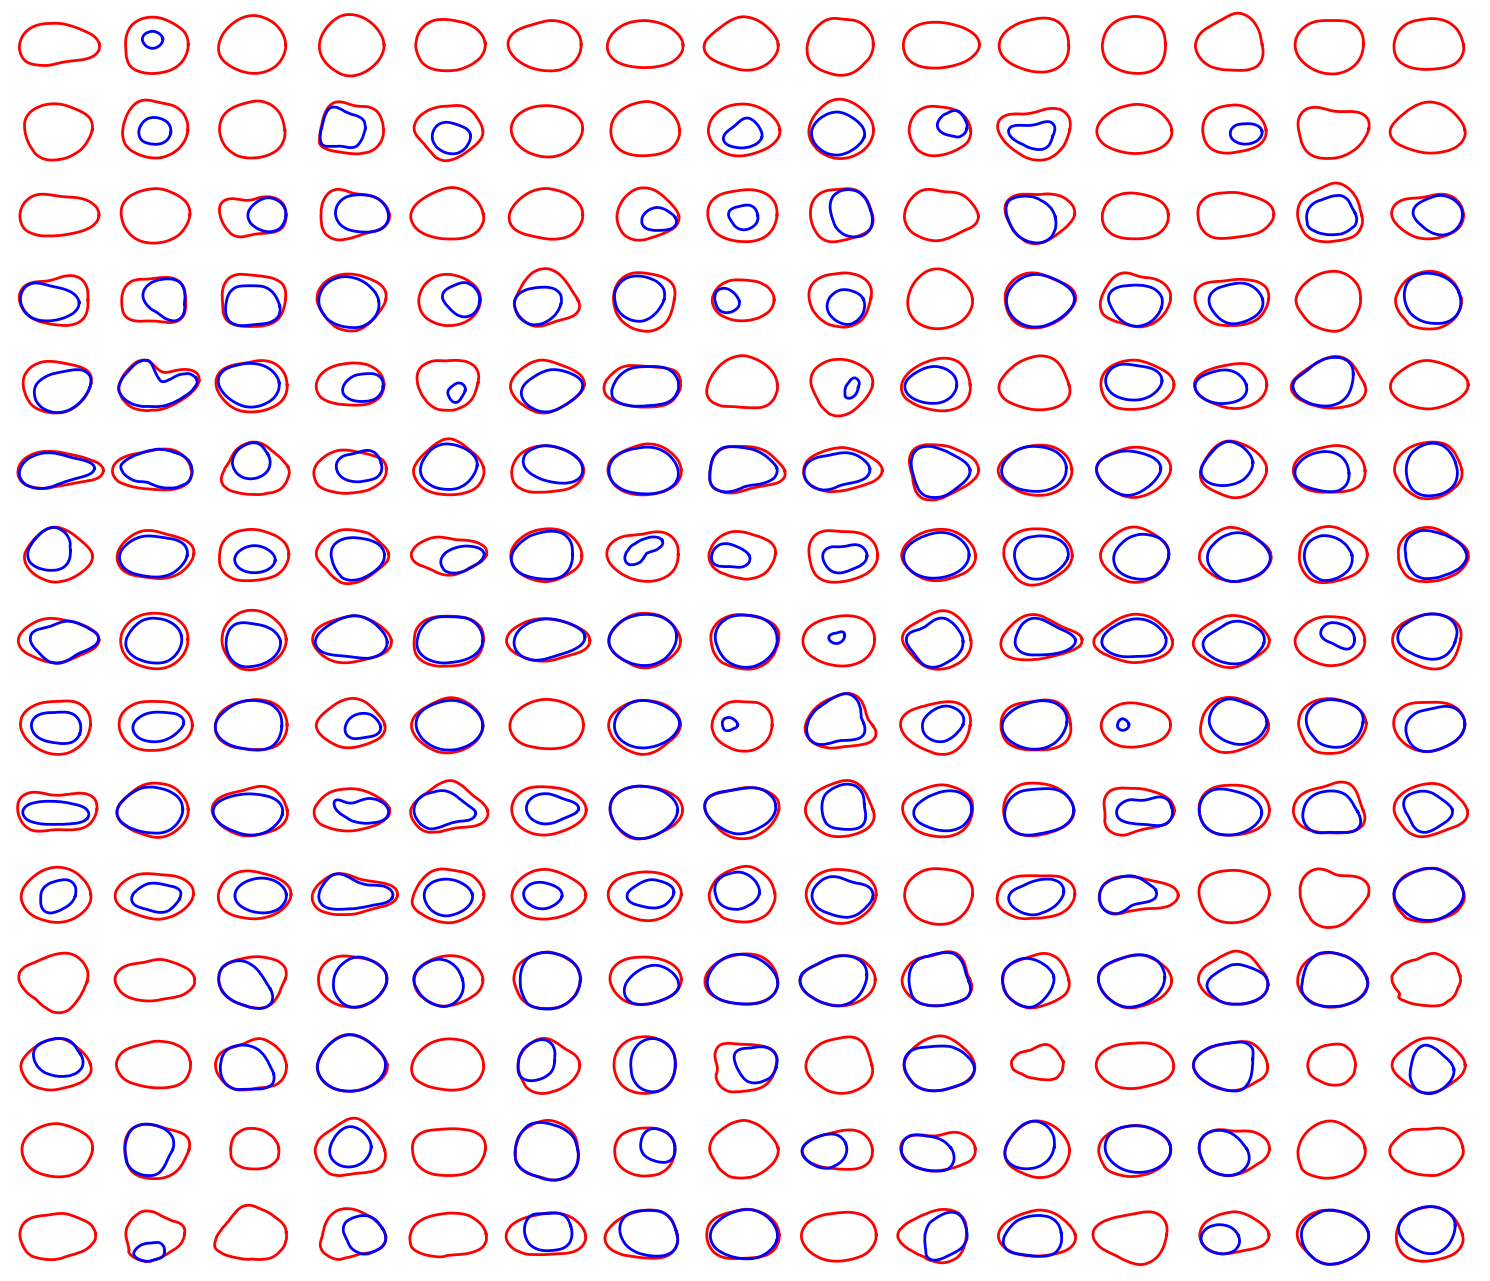

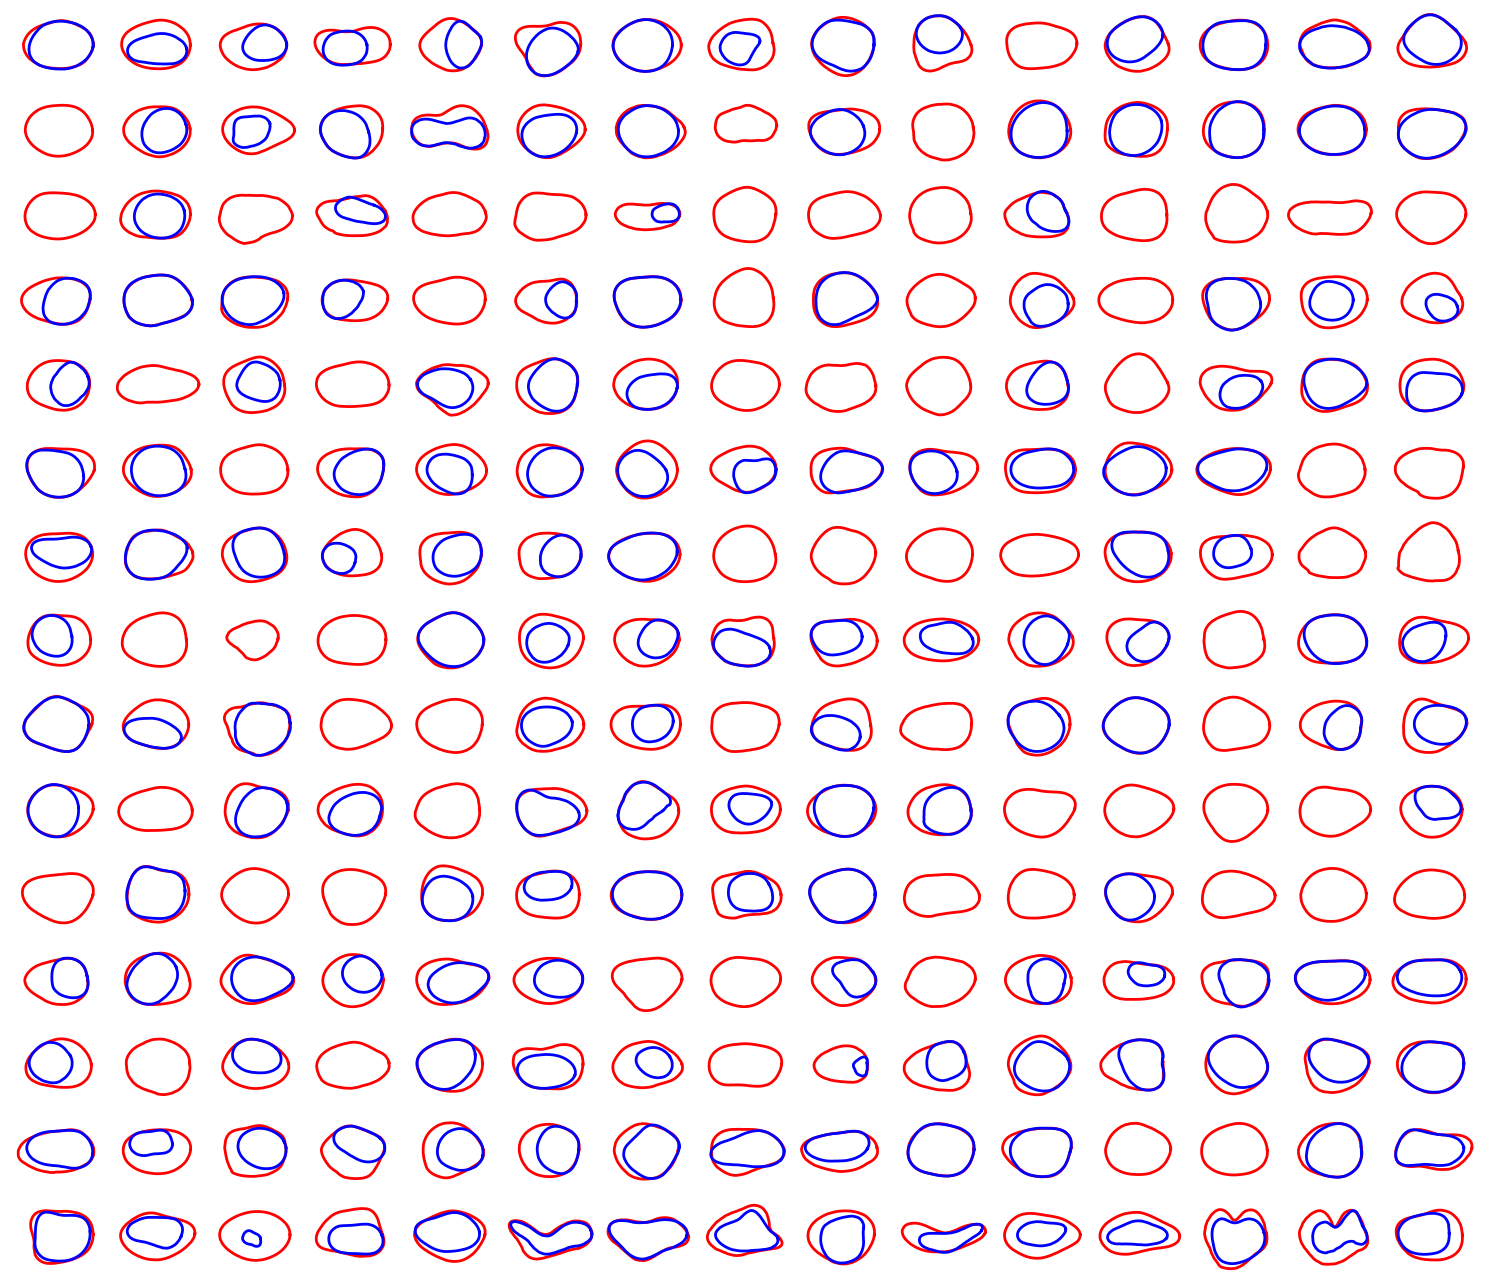

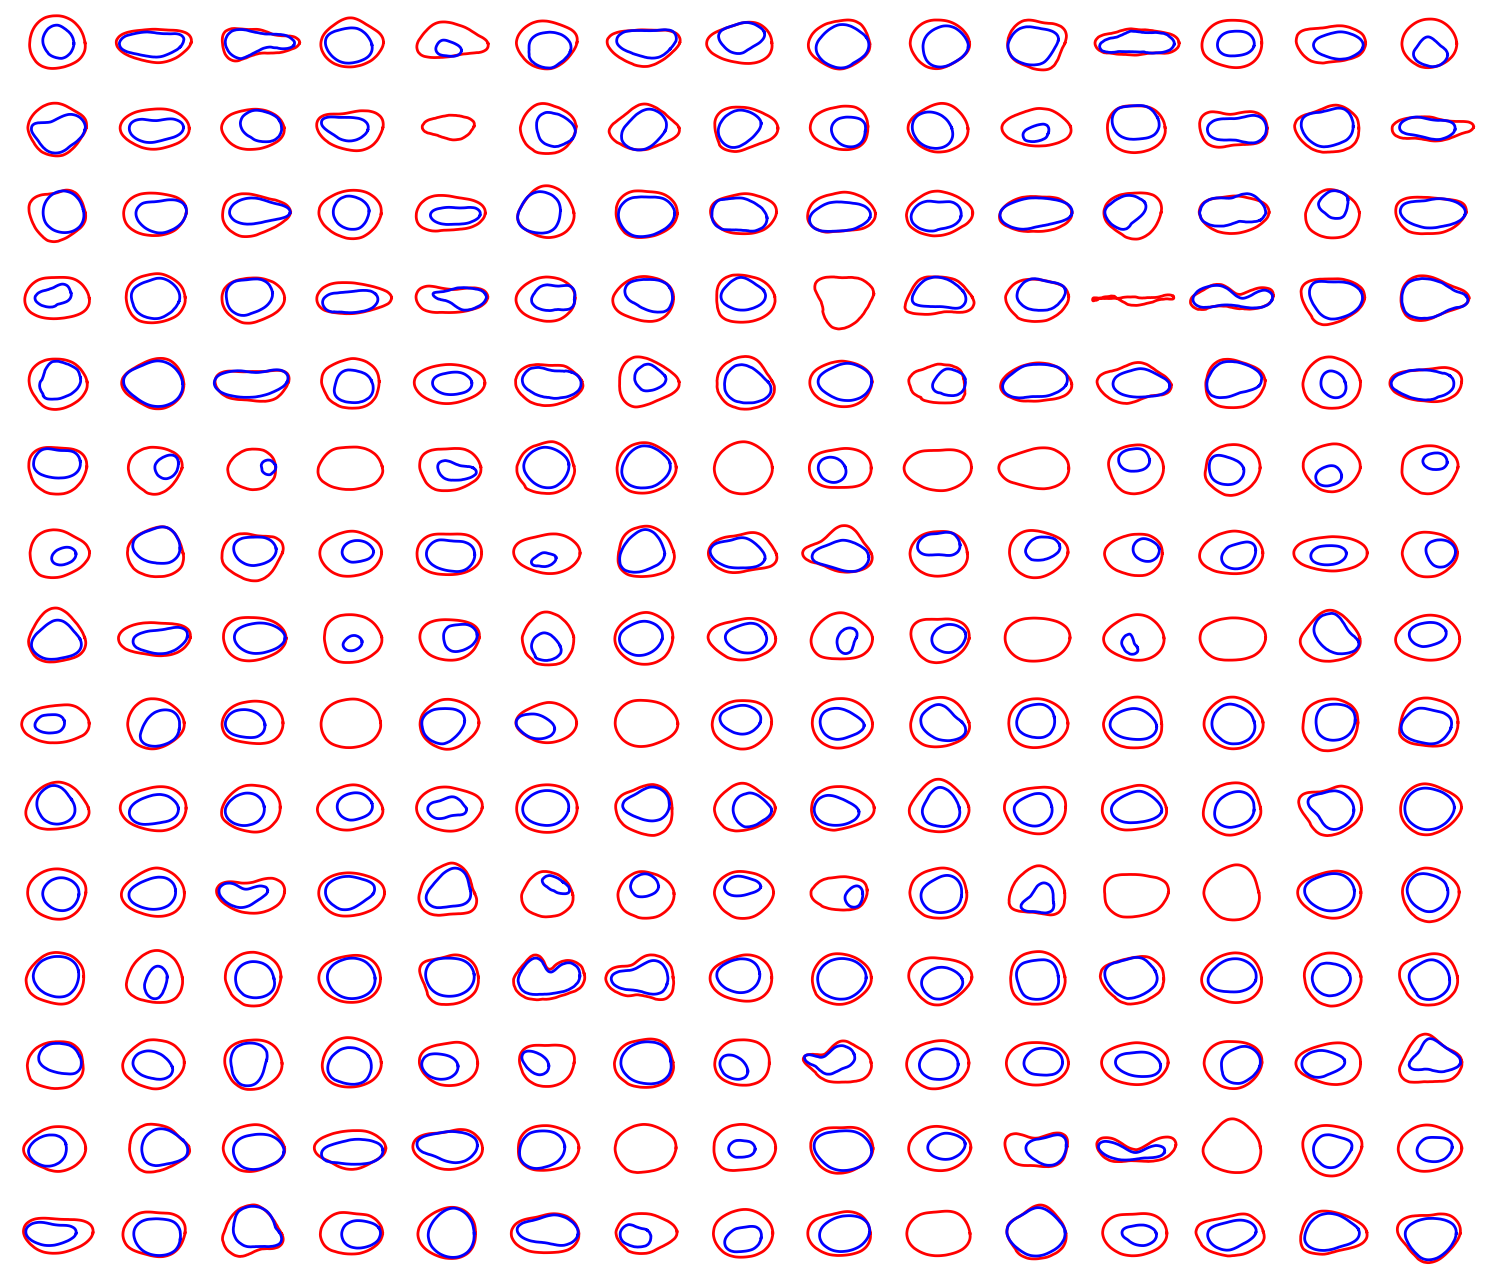

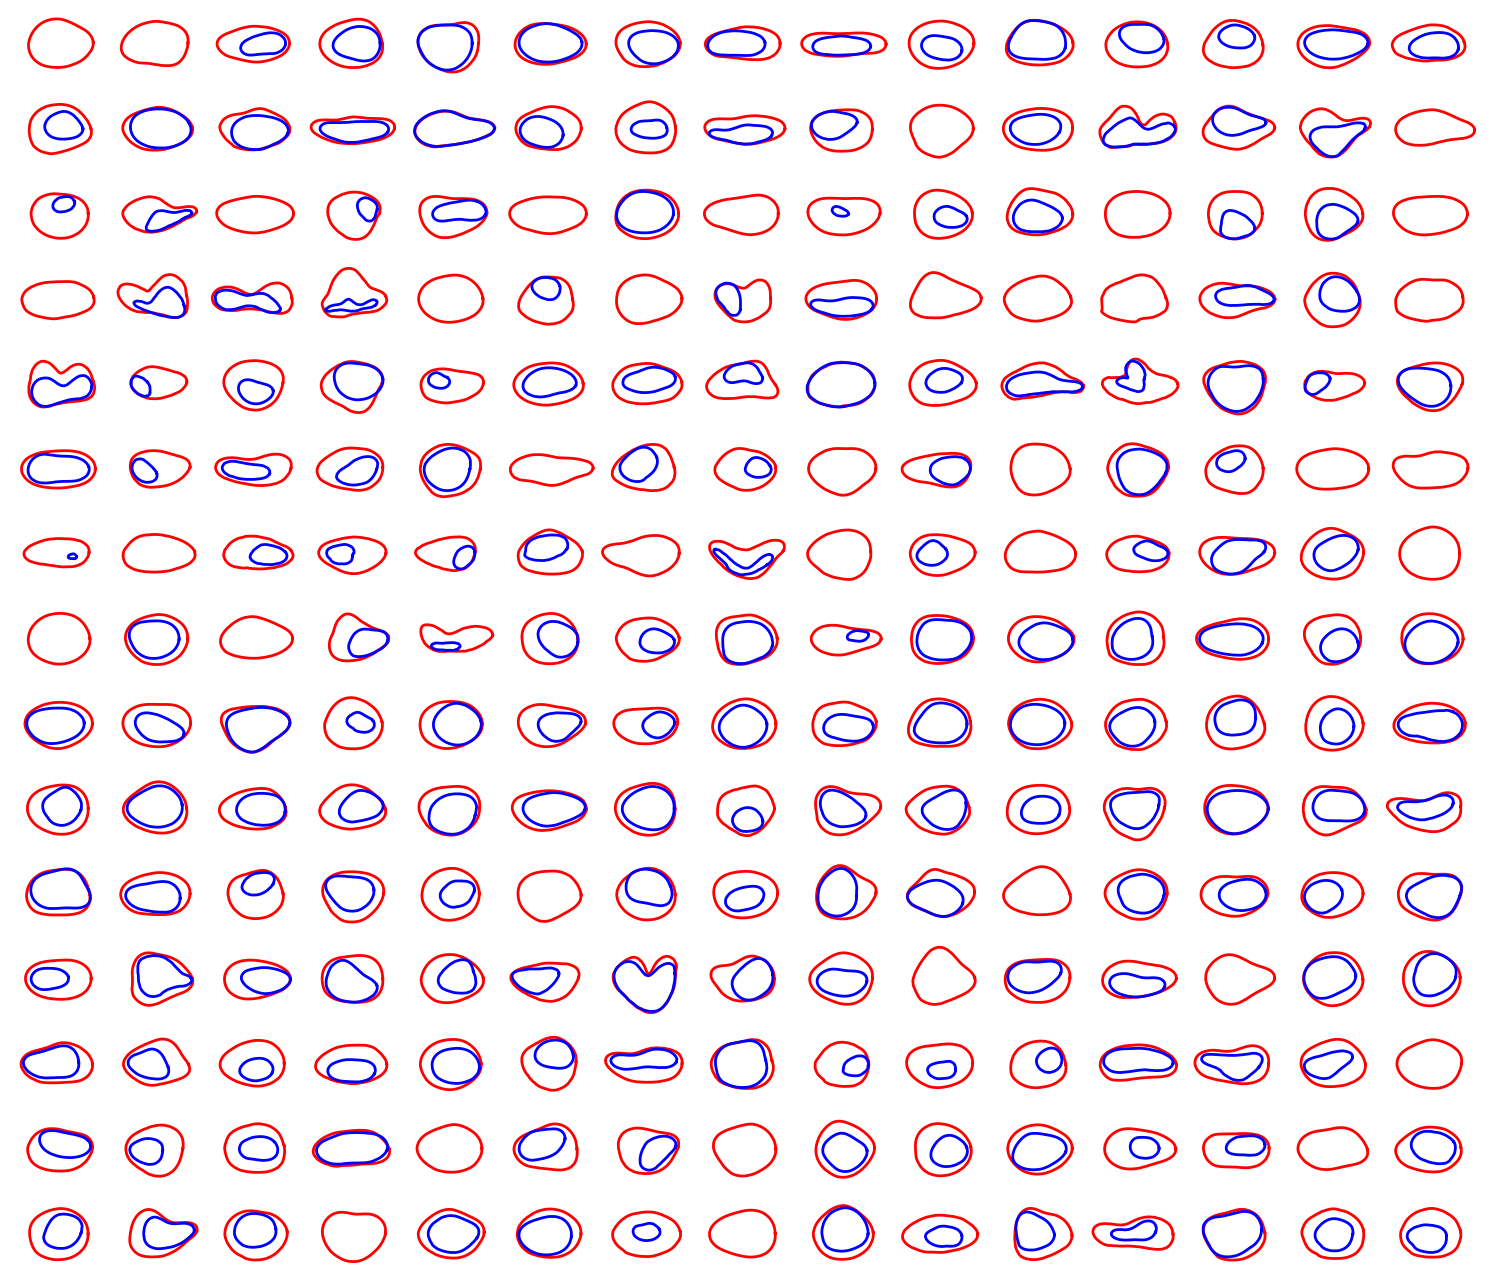

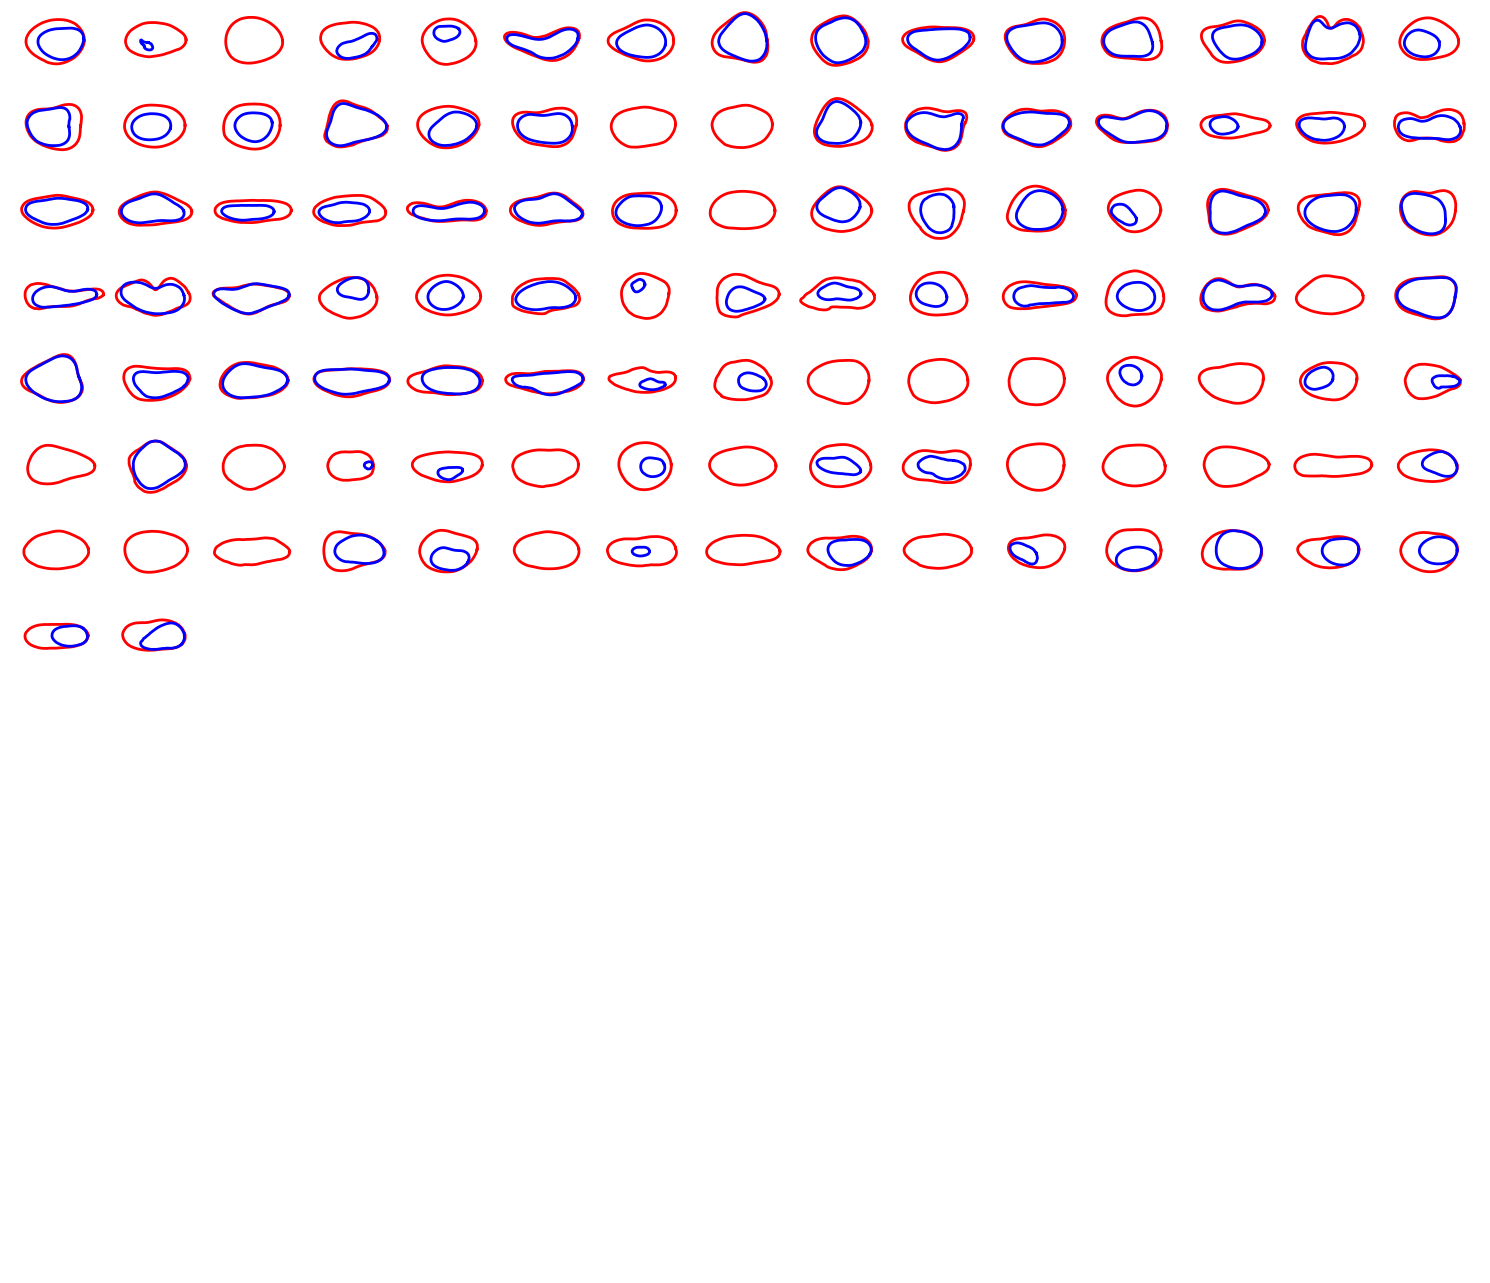

In [32]:
outlinePCA.plot_all_data(N, legends=False)

In [11]:
# save_path = p_dir / 'data' / 'morph' / 'outlinePCA.pkl'

# outlinePCA.save_pickle(save_path)

In [12]:
save_path = p_dir / 'data' / 'morph' / 'outlinePCA.pkl'

test = morph.OutlinePCA.load(save_path)

c:\Users\thu71\AppData\Local\anaconda3\envs\scanpy\Lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator PCA from version 1.1.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


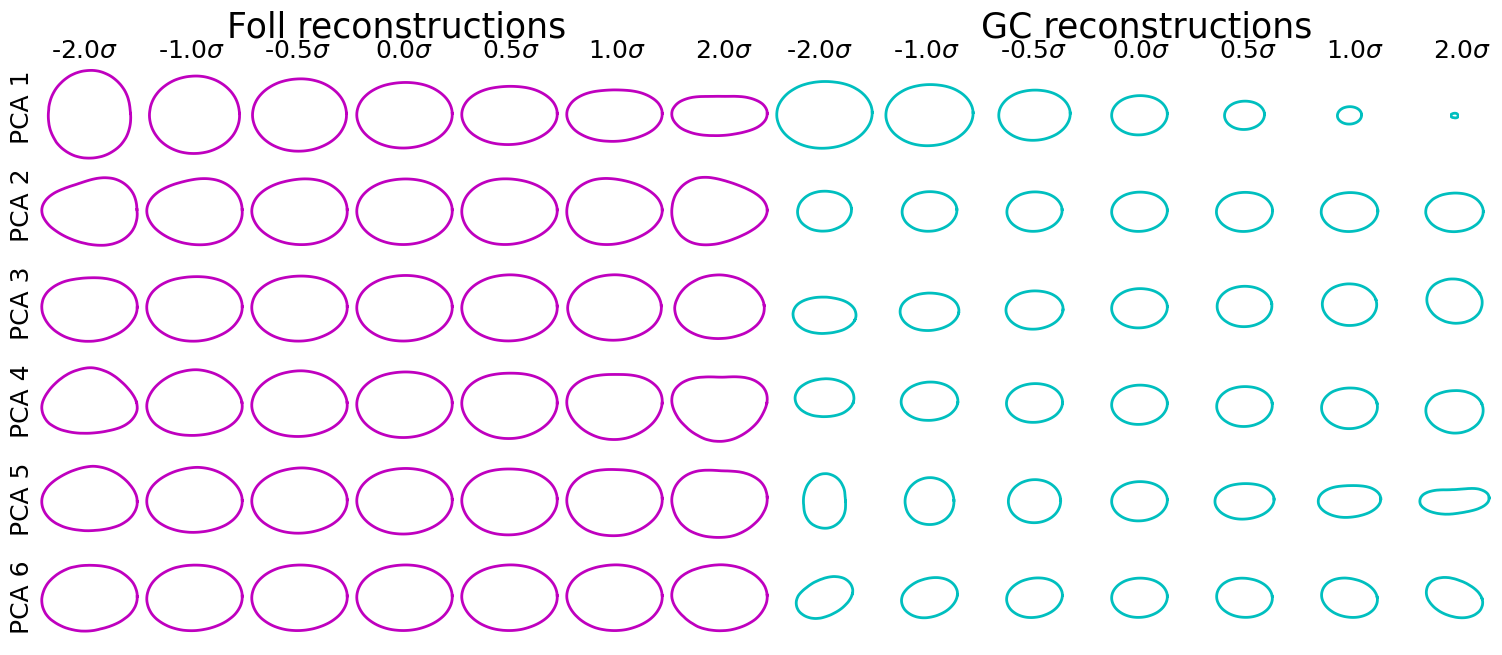

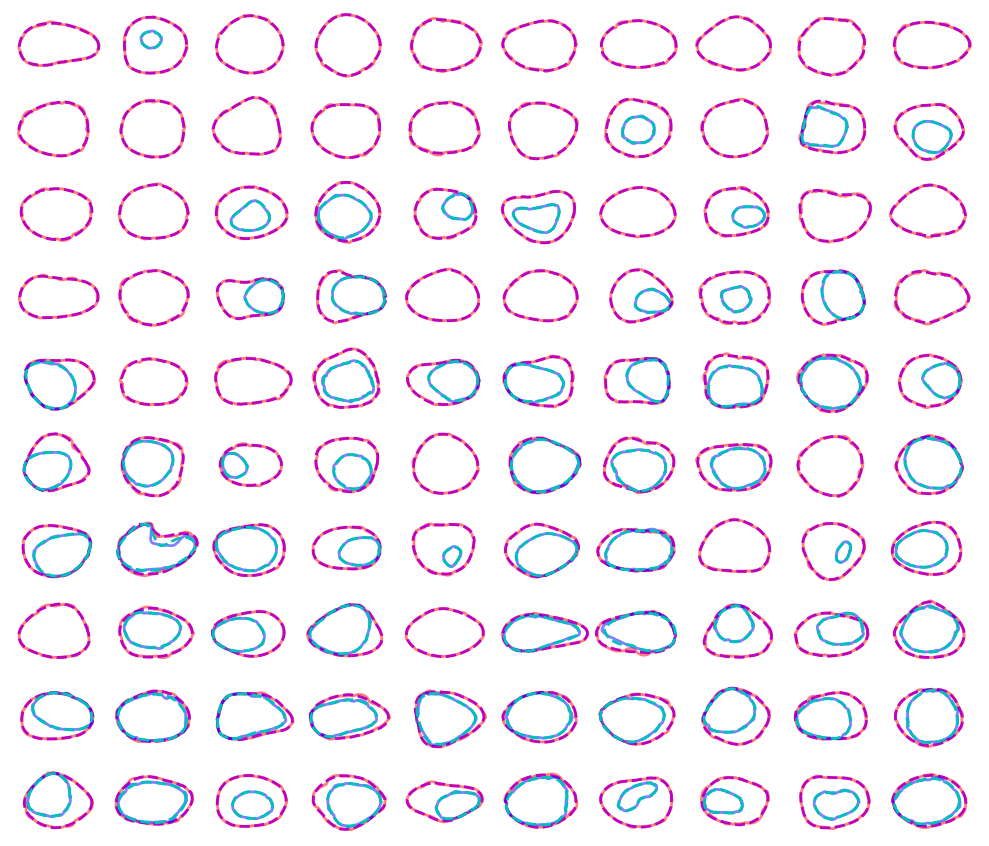

In [13]:
test.plot_latent_rep(N)
test.plot_latent_reconstruction(N)

In [16]:
scaler = StandardScaler()

test.df_weights['R'] = scaler.fit_transform(test.df_weights[['R']])

In [17]:
test.df_weights

Foll_SM_1  Foll_SM_2  Foll_SM_3  Foll_SM_4  Foll_SM_5  Foll_SM_6  \
0      1.279818   0.622330  -0.145492  -0.704664   0.003263  -0.119071   
1     -1.047168   0.359966   0.076698   0.045344   0.079749  -0.025356   
2     -1.007748  -0.105831  -0.158132  -0.177971  -0.132263  -0.080870   
3     -1.437309   0.136345  -0.092947   0.038547  -0.143657   0.065012   
4     -0.228771   0.331791   0.025879  -0.351765   0.350417   0.351120   
...         ...        ...        ...        ...        ...        ...   
1002   0.180008  -0.206107   0.049825  -0.343806  -0.011220  -0.221840   
1003   1.376010  -0.799780   0.585111   0.254304   0.247855  -0.076646   
1004   0.122304   0.056983   0.382348   0.303272   0.133624   0.207842   
1005   2.089839  -0.027347   0.954624   0.369733  -0.319167  -0.242675   
1006   1.520242  -0.428310   0.580399  -0.277539   0.138911  -0.023721   

      Foll_SM_7  Foll_SM_8  Foll_SM_9  Foll_SM_10  ...  GC_SM_10  GC_SM_11  \
0      0.060317  -0.074530  -0.161276    0.106304  ... -0.008836  0.007065   
1     -0.116617  -0.019825  -0.252378    0.074558  ...  0.075928 -0.052740   
2     -0.054974   0.077452   0.086907   -0.088910  ...  0.000119  0.004217   
3     -0.169402   0.114349   0.059315    0.016476  ...  0.002855  0.002889   
4      0.088461   0.013970   0.031813   -0.059809  ... -0.012112  0.014365   
...         ...        ...        ...         ...  ...       ...       ...   
1002   0.030612   0.070240  -0.212074   -0.004988  ... -0.364062 -0.007155   
1003  -0.170477  -0.109684  -0.113099    0.068217  ... -0.034931 -0.019337   
1004  -0.061888   0.019356  -0.026910   -0.117274  ...  0.217563  0.129298   
1005   0.033998  -0.008444   0.014683   -0.037158  ... -0.244024 -0.145158   
1006   0.093503  -0.185485  -0.171387    0.172367  ...  0.305491 -0.274503   

      GC_SM_12  GC_SM_13  GC_SM_14  GC_SM_15  GC_SM_16         R  GC  \
0     0.006026 -0.000918  0.005024 -0.012060 -0.002517 -0.852457   0   
1     0.008830 -0.014146  0.029710 -0.034478 -0.009398 -0.505876   1   
2     0.001923 -0.000113  0.002220 -0.009887 -0.002149 -0.846414   0   
3     0.000650 -0.000285  0.001688 -0.009485 -0.002010 -0.903448   0   
4     0.007796  0.004502  0.001602 -0.009270 -0.003021 -1.169396   0   
...        ...       ...       ...       ...       ...       ...  ..   
1002 -0.031678 -0.176476  0.139384 -0.066569 -0.037124  0.682639   1   
1003 -0.089569  0.011152  0.151529 -0.117277  0.027490 -0.025356   1   
1004 -0.003876  0.070792 -0.129626  0.087610  0.076379 -0.419016   1   
1005 -0.070429 -0.122115 -0.035169  0.137457  0.021516  0.140149   1   
1006 -0.114265  0.093600  0.069403 -0.144833 -0.141852 -0.567744   1   

             id  
0     00_LA_id1  
1     00_LA_id2  
2     00_LA_id3  
3     00_LA_id4  
4     00_LA_id5  
...         ...  
1002    08_id36  
1003    08_id37  
1004    08_id38  
1005    08_id39  
1006    08_id40  

[1007 rows x 35 columns]

In [ ]:
# for i in range(10):
#     # Get boundaries
#     foll_ori = test.df_bd.iloc[i]['foll'].transpose()
#     gc_ori = test.df_bd.iloc[i]['gc'].transpose()
#     if len(gc_ori) == 1:
#         gc_ori = gc_ori.transpose()
#     foll_re = test.df_new.iloc[i]['foll']
#     gc_re = test.df_new.iloc[i]['gc']
    
#     # Get mean
#     xc,yc = np.mean(gc_ori, axis=1)
#     diff = foll_ori-np.array([xc,yc])[:, np.newaxis]
#     length = np.max(np.apply_along_axis(lambda ele: np.sqrt(ele[0]**2 + ele[1]**2), 0, diff))
    
#     # Plot
#     fig, axs = plt.subplots(1,2, figsize=(6,3))
#     plot(data=foll_ori, ax=axs[0], N=N)
#     plot(data=gc_ori, ax=axs[0], N=N)
#     plot(data=foll_re, ax=axs[1], N=N)
#     plot(data=gc_re, ax=axs[1], N=N)
    
#     plot_point([yc,xc], test.df_new.iloc[i]['t0'], length, ax=axs[0])
#     plot_point([0,0], test.df_new.iloc[i]['t1'], 1, ax=axs[1])
#     plt.show()
